Question 1.1:
Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.


In [1]:
#Libraries used in the project
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
from matplotlib.pyplot import figure

Count of restraunts in Other Cities vs Delhi NCR
Other Cities : 705
Delhi NCR : 7947


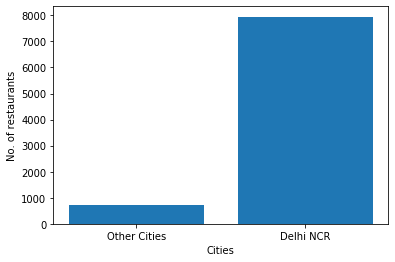

In [2]:
data = pd.read_csv("zomato.csv",encoding="latin-1") #Reading CSV file
data['City'] = data['City'].str.replace('Gurgaon','Delhi-NCR')
data['City'] = data['City'].str.replace('Noida','Delhi-NCR')
data['City'] = data['City'].str.replace('Faridabad','Delhi-NCR')
data['City'] = data['City'].str.replace('New Delhi','Delhi-NCR')
data['City'] = data['City'].str.replace('Ghaziabad','Delhi-NCR')
new = data[data["Country Code"] == 1]
others = new[new["City"] != "Delhi-NCR"].City.value_counts().sum() #Getting number of restaurants in other cities
delhi = new[new["City"] == "Delhi-NCR"].City.value_counts().sum() # Number of restaurants in Delhi NCR
countList = []
countList.append(others) #Appending number of other cities
countList.append(delhi) #Appending number of Delhi NCR
nameList = []
nameList.append("Other Cities") #Appending name
nameList.append("Delhi NCR") #Appnednig name
print("Count of restraunts in Other Cities vs Delhi NCR")
for i in range(len(nameList)):
    print(nameList[i], ":", countList[i]) #Display
plt.bar(nameList, countList) #plotting bar graph
plt.xlabel("Cities") #Label for x-axis
plt.ylabel("No. of restaurants") #Label for y-axis
plt.show() #printing graph

Question 1.2:
Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.

In [4]:
nonDelhi = new[new["City"] != "Delhi-NCR"] #Extracting non-Delhi Indian Data
delhi = new[new["City"] == "Delhi-NCR"] #Extracting data of Delhi
def Dictionary(array): #Creadting function
    dictionary = {} #Creating Dictionary
    for i in array: #Iterating through the parameter, argument will be Cuisines of delhi and non delhi 
        if("," not in i): #Checking if "," present if not
            if i.strip() in dictionary:  #Check if the name already exists in dictionary
                dictionary[i.strip()]=dictionary.get(i.strip())+1 #Incriment the value by 1
            else:
                dictionary[i.strip()]=1    #If name is not already present, add the name as key and value = 1
        else:
            string = i.strip().split(",") #If "," is present in the names split on the basis of ","
            for j in string: #Iterating through splitted data
                if j.strip() in dictionary: #Stripping means removes additional spaces around the data and checking dict
                    dictionary[j.strip()]=dictionary.get(j.strip())+1 #Incriment value if name already exists
                else: 
                    dictionary[j.strip()]=1 #If name is not already present, add the name as key and value = 1
    return dictionary #return dictionary

d_1 = Dictionary(delhi["Cuisines"]) #Passing argument and storing data in d_1
nonDelhi.fillna("Unknown", inplace = True) #Filling NA terms, in non-delhi data with "Unknown"
d_2 = Dictionary(nonDelhi["Cuisines"]) ##Passing argument and storing data in d_2
for i in d_2.keys(): #Iterating through non delhi data
    if i not in d_1.keys(): #Checking if exissts in delhi data
        print(i) #printing required data

German
Malwani
BBQ
Cajun


Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

In [47]:
from requests.auth import HTTPBasicAuth
h={"X-Zomato-API-Key":"a2aaf474ba14bcbebfe146ac58d1500a"} #API Key
c=requests.get('https://developers.zomato.com/api/v2.1/cuisines?city_id=1',headers=h,) # GET-REQUEST
data=c.json() #Converting to JSON format
lol=data['cuisines'] #Extracting Cuisines data
for i in lol: #Iterating through data with variable i
    if i['cuisine']['cuisine_name'] == 'Malwani': #Checking if Malwani Cuisine is available
        print(True) #If it is available printing True
    else:
        print("False") #If not available printing False

True


Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.


Top cuisines served in Delhi by restaurants are the following
We can also observe that most of the restaurants serve North Indian food as Delhi-Ncr is located in the northern 
part of india. Chinese is the most popular Foregin Cuisine loved by people of Delhi-NCR

In [49]:
#Delhi Data
finalDelhi=sorted(d_1.items(), key=lambda x: x[1], reverse=True) #Sorting Data on the basis of value in desc order
for i in range(10): #Extracing top 10 data, range is till 10
    
    print(finalDelhi[i][0],finalDelhi[i][1]) #Priting the required data

North Indian 3597
Chinese 2448
Fast Food 1866
Mughlai 933
Bakery 697
South Indian 569
Continental 547
Desserts 542
Street Food 538
Italian 535


Even if we take the case of Cuisines in Rest of India then we observe certain similarities like North Indian and 
Chinese as the top cuisines served by the restaurants

In [53]:
#Non - Delhi Data
finalRest=sorted(d_2.items(), key=lambda x: x[1], reverse=True)#Sorting Data on the basis of value in desc order
for i in range(0,10):  #Extracing top 10 data, range is till 10
    print(finalRest[i][0],finalRest[i][1]) #Priting the required data

North Indian 349
Chinese 242
Continental 177
Italian 147
Cafe 136
Fast Food 97
South Indian 62
Mughlai 59
Desserts 55
Mexican 50


########Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.############

QUESTION 2.1.1: Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.
Number of Votes given Restaurant

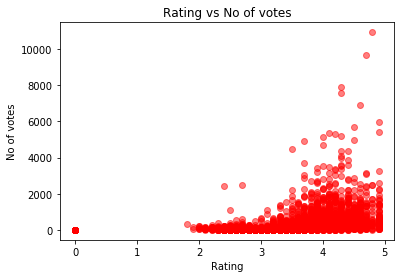

In [8]:
plt.scatter(data['Aggregate rating'],data['Votes'],c='r',alpha=0.5) #Plotting Aggregare Rating vs Votes
plt.title('Rating vs No of votes') #Title of the graph
plt.ylabel("No of votes") #Label of X-axis
plt.xlabel("Rating") #Label of Y-axis
plt.show() #Display graph

QUESTION 2.1.2: Restaurant serving more number of cuisines.

Average rating for single Cuisine restaurants: 2.234998530708197


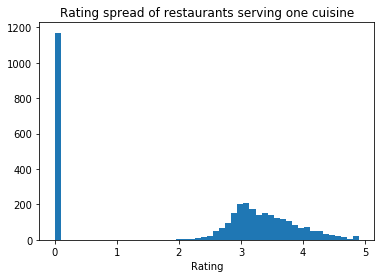

Average rating for single Cuisine restaurants: 2.9051398828887396


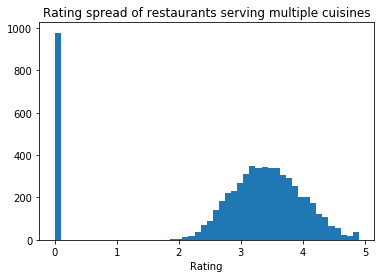

Number of resturants having one cuisine and rating below 1: 1170
Number of resturants having one cuisine and rating below 1: 978


In [9]:
data["Cuisines"].fillna("Unknown", inplace = True)
data["cuisine_number"] = data["Cuisines"].str.find(",") 
single = data[data["cuisine_number"] == -1]
multiple = data[data["cuisine_number"] != -1]
print("Average rating for single Cuisine restaurants:",single["Aggregate rating"].mean())
plt.hist(single["Aggregate rating"], bins = 50)
plt.title('Rating spread of restaurants serving one cuisine')
plt.xlabel("Rating")
plt.show()
print("Average rating for single Cuisine restaurants:",multiple["Aggregate rating"].mean())
plt.hist(multiple["Aggregate rating"], bins = 50)
plt.title('Rating spread of restaurants serving multiple cuisines')
plt.xlabel("Rating")
plt.show()
print("Number of resturants having one cuisine and rating below 1:", single[single["Aggregate rating"] < 1]["Restaurant ID"].count())
print("Number of resturants having one cuisine and rating below 1:", multiple[multiple["Aggregate rating"] < 1]["Restaurant ID"].count())


Hence we can see that more number of restaurants serving multiple cuisine have a rating
between 3-3.5 (peak of the graph) than compared to those serving only one Cuisine.
Both multiple and single Cuisine restaurants are almost equally likely to have a rating below 1 
Average rating of single Cuisine restaurant is 2.2
whereas for multiple cuisine restaurant is 2.9

Question-2.1.3 Average Cost of Restaurant

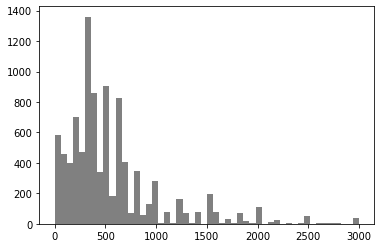

In [10]:
plt.hist(data['Average Cost for two'],range=[0,3000], facecolor='gray',bins=50)
plt.show()

This histogram shows us the spread of price for two. We can see that it peaks before 500 ,therefore we can deduce
that majority of the restaurants are in the price range of 0-500 

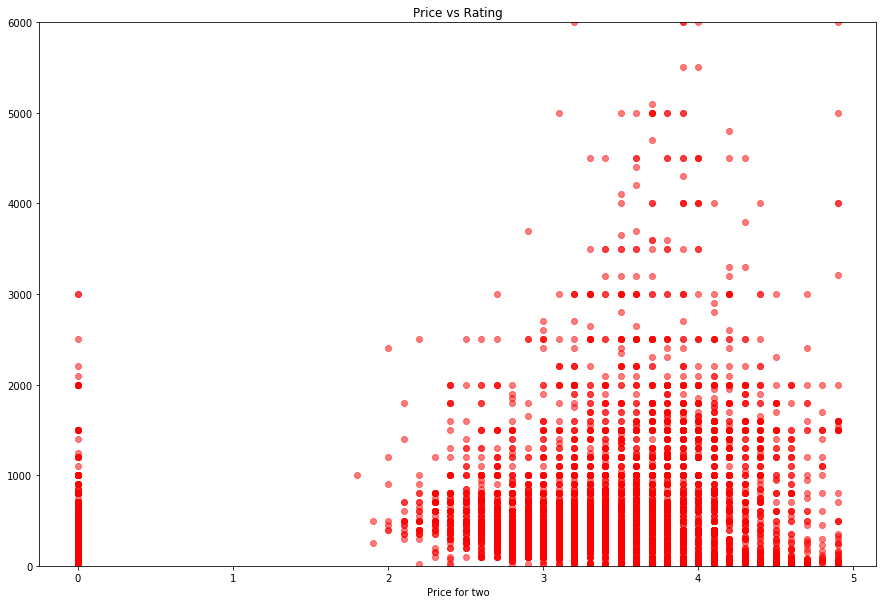

In [11]:
figure(num=None, figsize=(15, 10))
plt.scatter(data['Aggregate rating'],data['Average Cost for two'],c='r',alpha=0.5)
plt.title('Price vs Rating')
plt.xlabel("Price for two")
plt.ylim(0,6000)
plt.show()

This scatter plot shows us that some of the expensive restaurants are in the range of 3000 or 4000 above are 
generally high rated

Question: 2.2:

Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?
Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .

In [12]:
weight = {}
for i in data["Locality"].unique():
    loc = data[data["Locality"] == i]
    locality = loc["Locality"].values[0]
    weight[locality] = (loc["Votes"] * loc["Aggregate rating"]).sum() / loc["Votes"].sum()
    srt = {k: v for k, v in sorted(weight.items(), key=lambda item: item[1], reverse = True)}
a = list(srt.keys())
b = list(srt.values())
count = 0
while(count < 10):
    print(a[count], b[count])
    count += 1

C:\Users\Ritish\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


Sofitel Philippine Plaza Manila, Pasay City 4.9
Setor De Clubes Esportivos Sul 4.9
Gíçvea 4.9
The Milk District 4.9
Windermere 4.9
Paia 4.9
Kenwood 4.9
New Tampa 4.9
Venetian Village, Al Maqtaa 4.9
Deira City Centre Area 4.9


The above is the top 10 Weighted Restaurant rating of the complete dataset

Question 3.1: 

Plot the bar graph top 15 restaurants have a maximum number of outlets.


Cafe Coffee Day 83
Domino's Pizza 79
Subway 63
Green Chick Chop 51
McDonald's 48
Keventers 34
Pizza Hut 30
Giani 29
Baskin Robbins 28
Barbeque Nation 26
Giani's 22
Barista 22
Dunkin' Donuts 22
Pind Balluchi 20
Costa Coffee 20


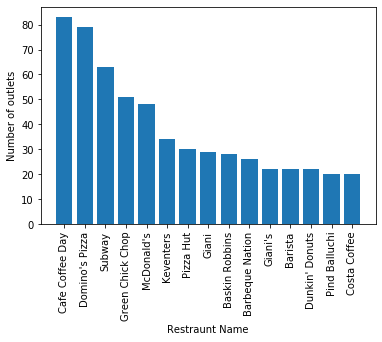

In [17]:
restValue = data["Restaurant Name"].value_counts()
rest  = list(restValue.index)
resCount = list(restValue.values)
count = 0
while(count < 15):
    print(rest[count], resCount[count])
    count += 1

plt.bar(rest[0:15], resCount[0:15])
plt.xticks(rotation=90)
plt.xlabel("Restraunt Name")
plt.ylabel("Number of outlets")
plt.show()

Question 3.2:
    
Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).

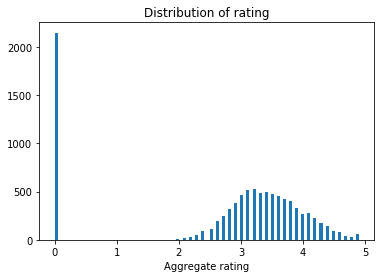

In [19]:
plt.hist(data['Aggregate rating'], align='mid',bins=100)
plt.xlabel("Aggregate rating")
plt.title("Distribution of rating")
plt.show()

We can deduce from here that there are alot of restaurants having a rating of 0 
Rest of the restaurant rating lie between 3 and 3.5. we can almost see a perfect pyramid shape in this histogram 

Question 3.3:

Plot the bar graph top 10 restaurants in the data with the highest number of votes.

Toit 10934
Truffles 9667
Hauz Khas Social 7931
Peter Cat 7574
AB's - Absolute Barbecues 6907
Barbeque Nation 5966
Big Brewsky 5705
AB's - Absolute Barbecues 5434
The Black Pearl 5385
BarBQ 5288


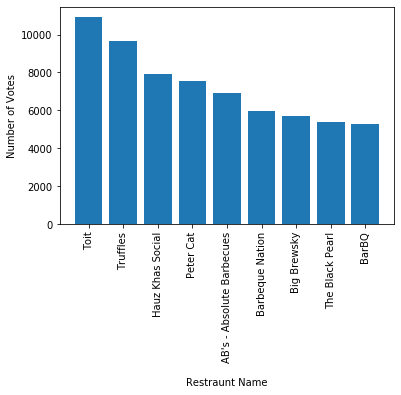

In [40]:
voteData = data.sort_values("Votes", ascending = False)
rName = []
for i in range(10):
    rName.append(voteData["Restaurant Name"].iloc[i])
rVotes = []
for i in range(10):
    rVotes.append(voteData["Votes"].iloc[i])
    
count = 0
while(count < 10):
    print(rName[count], rVotes[count])
    count += 1

plt.bar(rName, rVotes)
plt.xticks(rotation=90)
plt.ylabel("Number of Votes")
plt.xlabel("\n""Restraunt Name")
plt.show()

Toit is the Restaurant with highest number of votes at 10934

Question 3.4

plot the pie graph of top 10 cuisines present in restaurants in the USA.

American 112
Seafood 59
Burger 49
Sandwich 49
Pizza 49
Steak 42
Italian 38
Breakfast 37
Mexican 36
Sushi 34


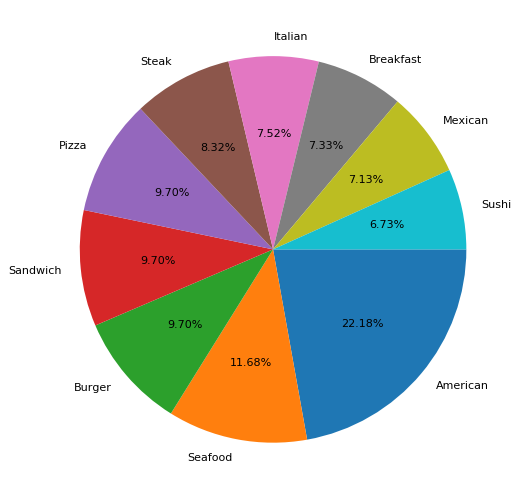

In [44]:
datausa=data[data['Country Code']==216]
datausa.Cuisines.fillna('Not Known',inplace=True)
def Dictionary(array):
    dictionary={}
    for i in array:
        if ',' not in i:
            if i.strip() in dictionary:
                dictionary[i.strip()]=dictionary.get(i.strip())+1
            else:
                dictionary[i.strip()]=1   
        else:
            string=i.strip().split(',')
            for j in string:
                if j.strip() in dictionary:
                    dictionary[j.strip()]=dictionary.get(j.strip())+1
                else:
                    dictionary[j.strip()]=1
    return dictionary 
Topcuisine=Dictionary(datausa['Cuisines'])
topc=sorted(Topcuisine.items(), key=lambda x: x[1], reverse=True)
xname=[]
for i in range(0,10):
    xname.append(topc[i][0])
ypie=[]
for i in range(0,10):
    ypie.append(topc[i][1])
for i in range(0,10):
    print(topc[i][0],topc[i][1])
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.pie(ypie,labels=xname,autopct='%.2f%%',counterclock=False)
plt.show()